In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv("input_data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'EstimatedSalary_K',
       'Purchased'],
      dtype='object')

In [8]:
df = df[['Age','EstimatedSalary_K','Purchased' ]]

### Build Model

In [57]:
X = df[['Age','EstimatedSalary_K']]
y = df['Purchased']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X,y)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_log_proba(X_test)

In [64]:
y_pred_prob.min()

-6.473037559024441

In [65]:
y.min(), y_pred.min()

(0, 0)

### Evaluation model

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
accuracy_score(y_test, y_pred)

0.83

In [68]:
confusion_matrix(y_test, y_pred)

array([[61,  7],
       [10, 22]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.76      0.69      0.72        32

    accuracy                           0.83       100
   macro avg       0.81      0.79      0.80       100
weighted avg       0.83      0.83      0.83       100



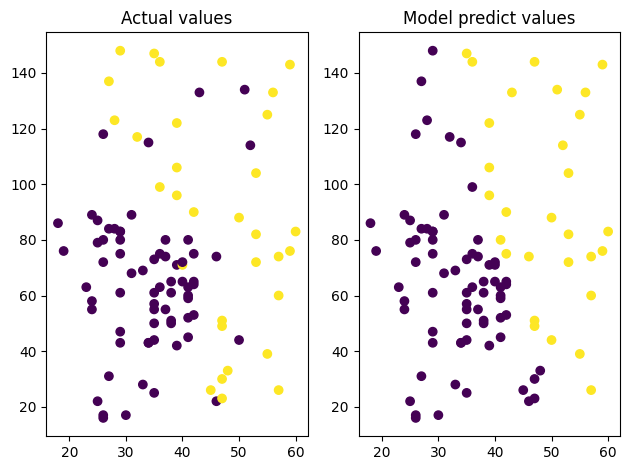

In [73]:
plt.subplot(1,2,1)
plt.scatter(X_test.Age, X_test.EstimatedSalary_K, c=y_test)
plt.title('Actual values')
plt.subplot(1,2,2)
plt.scatter(X_test.Age, X_test.EstimatedSalary_K, c=y_pred)
plt.title('Model predict values')
plt.tight_layout()
plt.show()

In [78]:
from matplotlib.colors import ListedColormap

In [79]:
X_set, Y_set = X_test, y_test

In [80]:
X1, X2 = np.meshgrid(np.arange(start=X_set.Age.min(), stop = X_set.Age.max()+1, step = 0.01),
                     np.arange(start=X_set.EstimatedSalary_K.min(), stop = X_set.EstimatedSalary_K.max()+1, step = 0.01))

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


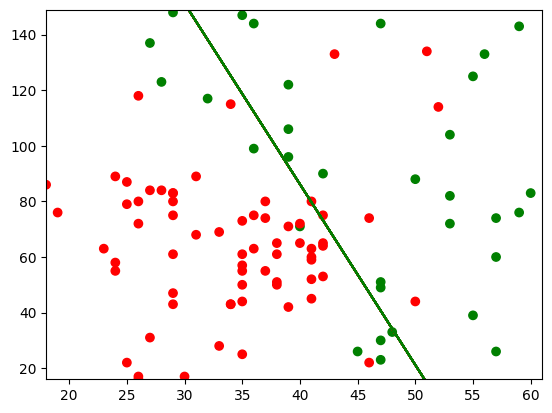

In [85]:
plt.contour(X1, X2, 
            model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set.Age, X_set.EstimatedSalary_K, c=Y_set, cmap=ListedColormap(('red','green')))
plt.show()

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


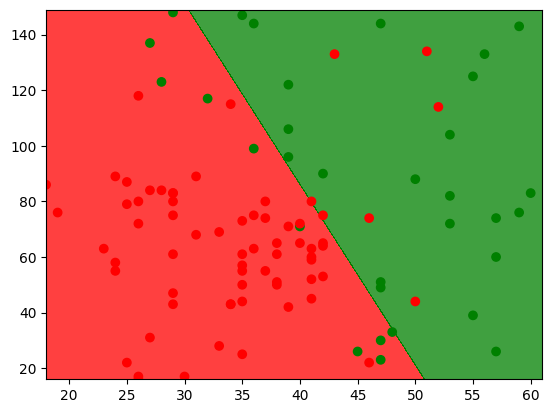

In [83]:
plt.contourf(X1,X2, 
             model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_set.Age, X_set.EstimatedSalary_K, c=Y_set, cmap=ListedColormap(('red','green')))

plt.show()

### Predict new value

In [84]:
X_new = pd.DataFrame([[40,120]], columns=X.columns)
X_new

,Age,EstimatedSalary_K
0,40,120


In [86]:
result = model.predict(X_new)
print(result)

[1]


### Select Kbest

In [93]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [91]:
selector = SelectKBest(score_func=chi2, k='all')
feature_result = selector.fit(X,y)

In [92]:
pd.DataFrame({'Score':feature_result.scores_,'Feature':X.columns}).sort_values('Score',ascending=False)

,Score,Feature
1,872.013169,EstimatedSalary_K
0,451.155226,Age


In [95]:
selector = SelectKBest(score_func=f_classif, k='all')
feature_result = selector.fit(X,y)

In [96]:
pd.DataFrame({'Score':feature_result.scores_,'Feature':X.columns}).sort_values('Score',ascending=False)

,Score,Feature
0,251.742061,Age
1,60.052579,EstimatedSalary_K
